# Export from bag

In [2]:
import pyrealsense2 as rs

def check_bag_streams(bag_file_path):
    try:
        # Initialize pipeline and config
        pipeline = rs.pipeline()
        config = rs.config()

        # Enable reading from bag file
        config.enable_device_from_file(bag_file_path, repeat_playback=False)

        # Start the pipeline
        pipeline.start(config)
        print("Pipeline started successfully.")

        # Get the active profile
        active_profile = pipeline.get_active_profile()

        # Query available streams
        print("Available streams in the bag file:")
        for stream in active_profile.get_streams():
            if stream.is_video_stream_profile():
                video_profile = stream.as_video_stream_profile()
                stream_type = stream.stream_type()
                resolution = (video_profile.width(), video_profile.height())
                frame_rate = video_profile.fps()
                format = video_profile.format()
                print(f"Stream: {stream_type}, Resolution: {resolution}, FPS: {frame_rate}, Format: {format}")
            else:
                print(f"Stream: {stream.stream_type()}, Format: {stream.format()}")

        # Stop the pipeline
        pipeline.stop()

    except Exception as e:
        print(f"Error: {e}")

# Example usage
check_bag_streams("../dataset/Door_Raw/A208/20240709_160857.bag")

Pipeline started successfully.
Available streams in the bag file:
Stream: stream.depth, Resolution: (848, 480), FPS: 30, Format: format.z16
Stream: stream.color, Resolution: (1280, 720), FPS: 30, Format: format.rgb8


In [1]:
# Exclusions
# B211: 160954
# A308T: 155729
exclusion = []

In [4]:
import make_dataset_v07 as md
import os
bags: dict = {}
paths = os.walk("../dataset/Door_Days_Raw/A208X/")
for path, _, file_lst in paths:
    for file_name in file_lst:
        if 'bag' in file_name:

            bags[file_name] = md.BagLoader(os.path.join(path, file_name))
            bags[file_name].export_images(multiprocess=True, show=False)
            bags[file_name].save_images('../dataset/Door_Days_Raw/A208X/')

20250113_151407.bag retrieving bag information...
 bag duration = 95.676286 seconds
 bag depth frames = 2869
 bag rgb frames = 2869
Start time for export_images: Wed Jan 22 11:05:07 2025


  0%|          |[00:00<?]

Entering capture
Pipeline started successfully.
Error waiting for frames: Frame didn't arrive within 30000
Capture finished!
Got none queue!
Got none queue!Got none queue!Got none queue!


Capture process finished!
End time for export_images: Wed Jan 22 11:20:19 2025
Total time: 911.671247959137 sec
Saving timestamps of len 2868
Saving depth images of (2868, 128, 226)
Saving rgb images of (2868, 128, 226, 3)...Done
20250113_151652.bag retrieving bag information...
 bag duration = 173.364352 seconds
 bag depth frames = 5198
 bag rgb frames = 5198
Start time for export_images: Wed Jan 22 11:21:24 2025


  0%|          |[00:00<?]

Entering capture
Pipeline started successfully.
Error waiting for frames: Frame didn't arrive within 30000
Capture finished!
Got none queue!
Got none queue!Got none queue!Got none queue!


Capture process finished!
End time for export_images: Wed Jan 22 11:48:30 2025
Total time: 1626.5411305427551 sec
Saving timestamps of len 5197
Saving depth images of (5197, 128, 226)
Saving rgb images of (5197, 128, 226, 3)...Done
20250113_152341.bag retrieving bag information...
 bag duration = 131.768305 seconds
 bag depth frames = 3951
 bag rgb frames = 3951
Start time for export_images: Wed Jan 22 11:49:57 2025


  0%|          |[00:00<?]

Entering capture
Pipeline started successfully.
Error waiting for frames: Frame didn't arrive within 30000
Capture finished!
Got none queue!
Got none queue!Got none queue!Got none queue!


Capture process finished!
End time for export_images: Wed Jan 22 12:10:41 2025
Total time: 1243.7515335083008 sec
Saving timestamps of len 3950
Saving depth images of (3950, 128, 226)
Saving rgb images of (3950, 128, 226, 3)...Done


In [6]:
print(bags.keys())

dict_keys(['20250112_143227.bag'])


In [7]:
print(bags['20250112_143227.bag'].depth_images.shape, bags['20250112_143227.bag'].depth_images.dtype)

(4757, 128, 226) uint16


# Preprocess images

### Single file

In [46]:
import make_dataset_v07 as md
cur = '20250113_151407'
imgloader = md.ImageLoader(f'../dataset/Door_Days_Raw/A208X/{cur}-rimg.npy')
imgloader.threshold_depth(3600)
imgloader.browse_images()

 Loaded 20250113_151407-rimg.npy of (2868, 128, 226) as uint16
Thresholding IMG within 3600...Done


interactive(children=(IntSlider(value=1433, description='i', max=2867), Output()), _dom_classes=('widget-inter…

Data reset!
Thresholding IMG within 3600...Done
Masking...Done


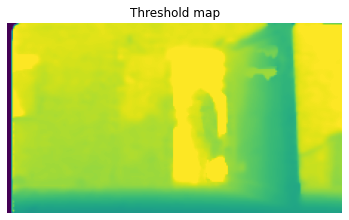

interactive(children=(IntSlider(value=1433, description='i', max=2867), Output()), _dom_classes=('widget-inter…

In [63]:
imgloader.reset_data()
imgloader.threshold_depth(3600)
imgloader.depth_mask(0.85)
# tmap = imgloader.depthmask.threshold
imgloader.rimg[:, :, :20] = 0
imgloader.browse_images()

In [23]:
imgloader.crop()

Cropping...

  0%|          | 0/3950 [00:00<?, ?it/s]

Done


In [41]:
import numpy as np
print(np.min(imgloader.rimg), np.max(imgloader.rimg), imgloader.rimg.dtype)

0 55704 uint16


In [44]:
imgloader = md.ImageLoader(f'../dataset/Door_Days/A208X/20250113_152341-rimg.npy')
print(np.min(imgloader.rimg), np.max(imgloader.rimg), imgloader.rimg.dtype)

 Loaded 20250113_152341-rimg.npy of (3950, 128, 226) as uint16
0 55686 uint16


In [45]:
imgloader.browse_images()

interactive(children=(IntSlider(value=1974, description='i', max=3949), Output()), _dom_classes=('widget-inter…

In [64]:
imgloader.save_images(f'../dataset/Door_Days/A208X/')

Saving 20250113_151407-rimg.npy rimg...Done


### Split and concatenate

In [36]:
import make_dataset_v07 as md
cur = '20250113_151407'
imgloader = md.ImageLoader(f'../dataset/Door_Days_Raw/A208X/{cur}-rimg.npy')
imgloader.threshold_depth(3600)
imgloader.browse_images()

 Loaded 20250113_151407-rimg.npy of (2868, 128, 226) as uint16
Thresholding IMG within 3600...Done


interactive(children=(IntSlider(value=1433, description='i', max=2867), Output()), _dom_classes=('widget-inter…

Cropping...

  0%|          | 0/2180 [00:00<?, ?it/s]

Done
Data reset!
Thresholding IMG within 3600...Done
Masking...Done


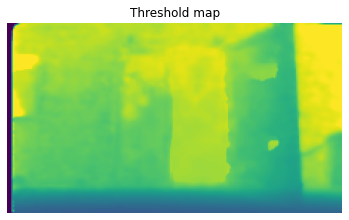

Cropping...

  0%|          | 0/1969 [00:00<?, ?it/s]

Done
Data reset!
Thresholding IMG within 3600...Done
Masking...Done


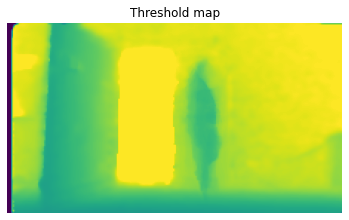

Cropping...

  0%|          | 0/1048 [00:00<?, ?it/s]

Done
Current length = 1048
Current length = 3017
Current length = 5197


interactive(children=(IntSlider(value=2598, description='i', max=5196), Output()), _dom_classes=('widget-inter…

In [35]:
interrupt1 = 1048
interrupt2 = 3017
imgloader.reset_data()
imgloader.rimg = imgloader.rimg[interrupt2:]
imgloader.threshold_depth(3600)
imgloader.depth_mask(tmap)
imgloader.rimg[:, :, :20] = 0
imgloader.crop()
trimmed1 = imgloader.export_trim()

# imgloader.reset_data()
# imgloader.rimg = imgloader.rimg[interrupt1:interrupt2]
# imgloader.threshold_depth(3600)
# imgloader.depth_mask(tmap)
# imgloader.rimg[:, :, :20] = 0
# imgloader.crop()
# trimmed2 = imgloader.export_trim()

imgloader.reset_data()
imgloader.rimg = imgloader.rimg[:interrupt1]
imgloader.threshold_depth(3600)
imgloader.depth_mask(0.85)
imgloader.rimg[:, :, :20] = 0
imgloader.crop()

imgloader.concat_trim([trimmed2, trimmed1])
imgloader.browse_images()

In [33]:
print(tmap)

None


In [20]:
imgloader.save_images(f'../dataset/Door_Days/A208X/')

Saving 20250113_151652-rimg.npy rimg...Done
Saving 20250113_151652-rimg.npy cimg...Done
Saving 20250113_151652-rimg.npy bbx...Done
Saving 20250113_151652-rimg.npy ctr...Done
Saving 20250113_151652-rimg.npy dpt...Done


### Concatenate multiple

In [5]:
import numpy as np
import make_dataset_v07 as md
cur = '20250113_151407'
imgloader = md.ImageLoader(f'../dataset/Door_Days/A208X/{cur}-rimg.npy')
ref = md.ImageLoader(f'../dataset/Door_Days/A208Ref/20250113_145405-rimg.npy')

imgloader.raw_images = md.Raw(np.concatenate((imgloader.images, ref.images)))
imgloader.images = imgloader.raw_images.value

 Loaded 20250113_151407-rimg.npy of (2868, 128, 226) as uint16
 Loaded 20250113_145405-rimg.npy of (10978, 128, 226) as uint16


Data reset!
Thresholding IMG within 3900...Done
Masking...Done


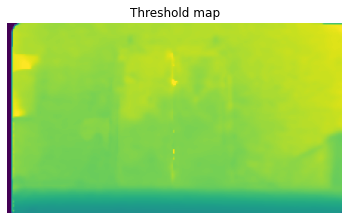

interactive(children=(IntSlider(value=149, description='i', max=299), Output()), _dom_classes=('widget-interac…

In [7]:
imgloader.reset_data()
imgloader.threshold_depth(3900)
imgloader.depth_mask(0.85)
imgloader.images[:, :, :20] = 0
imgloader.browse_images(bound=(0, 300))

In [8]:
imgloader_ = md.ImageLoader(f'../dataset/Door_Days/A208D1/20250111_155521-rimg.npy')
imgloader_.browse_images()

 Loaded 20250111_155521-rimg.npy of (8212, 128, 226) as uint16


interactive(children=(IntSlider(value=4105, description='i', max=8211), Output()), _dom_classes=('widget-inter…

### Batch process

 Loaded 20250112_143008-rimg.npy of (3529, 128, 226) as uint16
Thresholding IMG within 3600...Done
Masking...Done


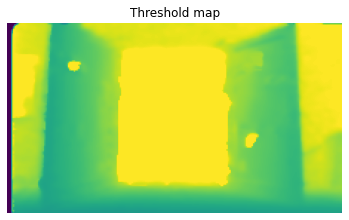

0 55704 uint16
Cropping...

  0%|          | 0/3529 [00:00<?, ?it/s]

Done
Saving images...Done
Saving cropped...Done
 Loaded 20250112_143543-rimg.npy of (4576, 128, 226) as uint16
Thresholding IMG within 3600...Done
Masking...Done


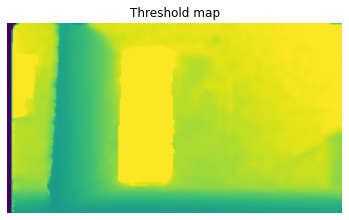

0 55704 uint16
Cropping...

  0%|          | 0/4576 [00:00<?, ?it/s]

Done
Saving images...Done
Saving cropped...Done
 Loaded 20250112_143830-rimg.npy of (6283, 128, 226) as uint16
Thresholding IMG within 3600...Done
Masking...Done


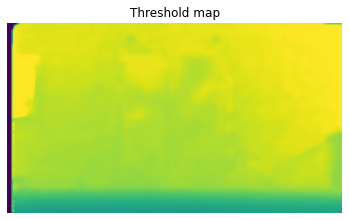

0 55650 uint16
Cropping...

  0%|          | 0/6283 [00:00<?, ?it/s]

Done
Saving images...Done
Saving cropped...Done


interactive(children=(IntSlider(value=3141, description='i', max=6282), Output()), _dom_classes=('widget-inter…

In [3]:
import make_dataset_v07 as md
import numpy as np
import os

paths = os.walk("../dataset/Door_Days/A208D2/")
for path, _, file_lst in paths:
    for file_name in file_lst:
        if 'npy' in file_name and 'rimg' in file_name:
            if '143227' not in file_name:
                imgloader = md.ImageLoader(os.path.join(path, file_name))
                # imgloader.reset_data()
                imgloader.threshold_depth(3600)
                imgloader.depth_mask(0.85)
                imgloader.images[:, :, :20] = 0

                print(np.min(imgloader.images), np.max(imgloader.images), imgloader.images.dtype)

                imgloader.crop()
                imgloader.save_images()
                imgloader.save_cropped()
            
imgloader.browse_images()